# ANEXO. Interpolación de variables _ingreso_, _pobreza_ y _pob_ext_

Para la elaboración de la base de datos fue necesario contar con el nivel de ingreso de los hogares, el porcentaje de población en situación de pobreza y de pobreza extrema para los años 2015-2019, para cada entidad federativa. Sin embargo, estas variables se calculan de manera oficial con periodicidad bianual, por lo que se realizó un ejercicio de interpolación (con base en los métodos observados en el curso) para poder contar con una estimación para el periodo de interés.


**Consideraciones adicionales sobre los datos origen**

_Ingreso promedio de los hogares._

La fuente de los datos es la Encuesta Nacional de Ingreso y Gasto de los Hogares (ENIGH) elaborada por el INEGI con periodicidad bianual y se tomó la serie que va de 2008 a 2018.

**Obs.** Es importante mencionar que, a partir de 2016 (y para 2018), el INEGI cambió la metodología de levantamiento de la encuesta (que afectó específicamente los resultados para el ingreso no laboral), por lo que la ENIGH Nueva metodología perdió comparabilidad con las series previas de 2008 a 2014. No obstante, el INEGI desarrolló una metodología en conjunto con el CONEVAL, para lograr que los nuevos levantamientos fueran comparables con la serie 2008-2014 y continuar evaluando la evolución de la pobreza. (Ver [MCS-ENIGH para la continuidad](https://www.inegi.org.mx/contenidos/investigacion/eash/2016/doc/NT1.pdf))

En ese sentido, para lograr comparabilidad en la serie y evitar inconsistencias en los resultados, en nuestra base de datos utilizamos el ingreso proveniente del "Modelo Estadístico 2016 para la continuidad del MCS-ENIGH" para los años 2016 y 2018.

Asimismo, para mitigar el efecto de los precios, se estimó el ingreso anual promedio de los hogares a precios constantes (deflactado con el INPC base 100 = segunda quincena de 2018). Con esto, la variable _ingreso_ y los valores provenientes de la interpolación reflejan la evolución en términos reales.

Fuente: [ENIGH - INEGI](https://www.inegi.org.mx/programas/enigh/nc/2018/)


_Pobreza y pobreza extrema_

El origen de los datos es el CONEVAL, que calcula para 2008-2018 el número de personas en situación de pobreza multidimensional y pobreza extrema, así como el porcentaje que representan de la población en cada entidad federativa, con periodicidad bianual.

Para nuestra base de datos tomamos el porcentaje de la población en ambos casos.

**Obs**. La pobreza multidimensional calculada por el CONEVAL, como su nombre lo indica, incorpora distintas dimensiones para considerar si una persona se encuentra en situación de pobreza. Éstas dimensiones se nombran carencias y son las siguientes:

- Ingreso
- Rezago educativo
- Acceso a servicios de salud
- Acceso a seguridad social
- Calidad y espacios de la vivienda
- Acceso a servicios básicos en la vivienda
- Acceso a la alimentación

En México, se considera que una persona se encuentra en situación de pobreza si tiene un ingreso menor a la Línea de Bienestar y tiene al menos una de las seis carencias restantes.

Se considera que se encuentra en situación de pobreza extrema si el ingreso está por debajo de la línea de bienestar mínimo y tiene al menos tres de las seis carencias restantes.

Fuente: [CONEVAL](https://www.coneval.org.mx/Medicion/Paginas/PobrezaInicio.aspx)



**A continuación se muestra la interpolación de dichas variables**

In [8]:
import pandas as pd

**Ingreso**

Cargamos los datos de 2008

In [2]:
ing2008 = pd.read_csv("data_csv/ing2008.csv")
print(ing2008[0:5])

   anio  clave_ent           nombre_ent  ingcor_anual
0  2008          1       Aguascalientes        274708
1  2008          2      Baja California        287695
2  2008          3  Baja California Sur        297862
3  2008          4             Campeche        232586
4  2008          5             Coahuila        237882


y para el resto de los años

In [3]:
ing2010 = pd.read_csv("data_csv/ing2010.csv")
ing2012 = pd.read_csv("data_csv/ing2012.csv")
ing2014 = pd.read_csv("data_csv/ing2014.csv")
ing2016 = pd.read_csv("data_csv/ing2016.csv")
ing2018 = pd.read_csv("data_csv/ing2018.csv")

In [4]:
ingreso=pd.concat([ing2008,ing2010,ing2012,ing2014,ing2016,ing2018],axis=0)
ingreso

,anio,clave_ent,nombre_ent,ingcor_anual
0,2008,1,Aguascalientes,274708.0
1,2008,2,Baja California,287695.0
2,2008,3,Baja California Sur,297862.0
3,2008,4,Campeche,232586.0
4,2008,5,Coahuila,237882.0
...,...,...,...,...
27,2018,28,Tamaulipas,181031.0
28,2018,29,Tlaxcala,151728.0
29,2018,30,Veracruz,112360.0
30,2018,31,Yucatan,191822.0


Se generan subcojuntos de la base para cada estado:

In [5]:
ags = ingreso[ingreso.clave_ent==1]
bc = ingreso[ingreso.clave_ent==2]
bcs = ingreso[ingreso.clave_ent==3]
cam = ingreso[ingreso.clave_ent==4]
coah = ingreso[ingreso.clave_ent==5]
col = ingreso[ingreso.clave_ent==6]
chi = ingreso[ingreso.clave_ent==7]
chh = ingreso[ingreso.clave_ent==8]
cdmx = ingreso[ingreso.clave_ent==9]
dur = ingreso[ingreso.clave_ent==10]
gto = ingreso[ingreso.clave_ent==11]
gro = ingreso[ingreso.clave_ent==12]
hgo = ingreso[ingreso.clave_ent==13]
jal = ingreso[ingreso.clave_ent==14]
edomex = ingreso[ingreso.clave_ent==15]
mich = ingreso[ingreso.clave_ent==16]
mor = ingreso[ingreso.clave_ent==17]
nay = ingreso[ingreso.clave_ent==18]
nl = ingreso[ingreso.clave_ent==19]
oax = ingreso[ingreso.clave_ent==20]
pue = ingreso[ingreso.clave_ent==21]
qro = ingreso[ingreso.clave_ent==22]
qroo = ingreso[ingreso.clave_ent==23]
slp = ingreso[ingreso.clave_ent==24]
sin = ingreso[ingreso.clave_ent==25]
son = ingreso[ingreso.clave_ent==26]
tab = ingreso[ingreso.clave_ent==27]
tam = ingreso[ingreso.clave_ent==28]
tla = ingreso[ingreso.clave_ent==29]
ver = ingreso[ingreso.clave_ent==30]
yuc = ingreso[ingreso.clave_ent==31]
zac = ingreso[ingreso.clave_ent==32]

In [6]:
ags

,anio,clave_ent,nombre_ent,ingcor_anual
0,2008,1,Aguascalientes,274708.0000
0,2010,1,Aguascalientes,209382.0000
0,2012,1,Aguascalientes,202498.0000
0,2014,1,Aguascalientes,209601.6464
0,2016,1,Aguascalientes,203879.0000
0,2018,1,Aguascalientes,222261.0000


In [7]:
zac

,anio,clave_ent,nombre_ent,ingcor_anual
31,2008,32,Zacatecas,203605.0000
31,2010,32,Zacatecas,123413.0000
31,2012,32,Zacatecas,139706.0000
31,2014,32,Zacatecas,135591.4443
31,2016,32,Zacatecas,150466.0000
31,2018,32,Zacatecas,140328.0000


Visualizamos los datos, para Aguascalientes:

In [8]:
import matplotlib.pyplot as plt

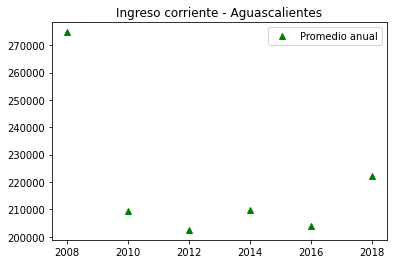

In [9]:
plt.plot(ags.anio,ags.ingcor_anual,"g^")
plt.legend(["Promedio anual"], loc=0)
plt.title("Ingreso corriente - Aguascalientes")
plt.show()

### Interpolación para _ingreso_
Con base en la metdología vista en el curso, interpolamos los datos a través de splines cúbicos, de tal forma que "suavizemos" la curva.

In [10]:
import numpy as np
import scipy
from scipy.interpolate import interp1d

In [11]:
mpoints=2018-2008+1

In [12]:
ags_sc=interp1d(ags.anio,ags.ingcor_anual,kind="cubic")
anio_bd=np.linspace(min(ags.anio),max(ags.anio),mpoints)
ags_eval=ags_sc(anio_bd)
ags_bd=pd.DataFrame({"anio":anio_bd[7:],"01":ags_eval[7:]})
ags_bd

,anio,01
0,2015.0,207024.339013
1,2016.0,203879.000000
2,2017.0,206759.822587
3,2018.0,222261.000000


**Visualizamos la serie interpolada:**

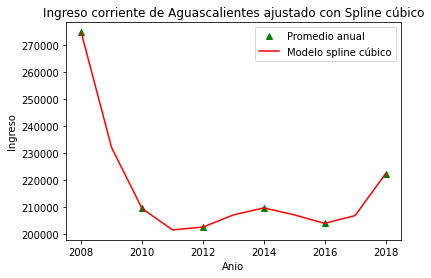

In [13]:
plt.plot(ags.anio,ags.ingcor_anual,"g^",
         anio_bd,ags_sc(anio_bd),"-r")
plt.xlabel("Anio")
plt.ylabel("Ingreso")
plt.legend(["Promedio anual","Modelo spline cúbico"],loc=0)
plt.title("Ingreso corriente de Aguascalientes ajustado con Spline cúbico")
plt.show()

Hacemos los **31 spline restantes** correspondientes al resto de las entidades y los almacenamos en "mini" data frames para cada estado, que contienen el valor de cada variable para los años 2015, 2016, 2017 y 2018:


### Obs.

Los splines cúbicos tienen la limitante de que no permiten evaluar valores fuera del rango. No obstante consideramos que esto no contrarresta los beneficios de usarlo, ya que cualquier otro modelo de interpolación visto en clase que nos permita evaluar valores fuera del rango, nos arrojaría una estimación que no tendría ningún sustento sólido para creer que el ingreso (o la pobreza) se comportó de esa hipotética manera. Es decir, no nos permitiría estimar de forma "consistente" la evolución del ingreso en 2019 a partir de observaciones bianuales para 2008-2018.

Esto se debe a que el ingreso está en función de otras variables difíciles de predecir (como crecimiento de la economía, nivel de ocupación, formalidad, entre otras) y cuya predicción se encuentra fuera del alcance del presente documento.

In [14]:
bc_sc=interp1d(bc.anio,bc.ingcor_anual,kind="cubic")
bc_eval=bc_sc(anio_bd)
bc_bd=pd.DataFrame({"anio":anio_bd[7:],"02":bc_eval[7:]})

bcs_sc=interp1d(bcs.anio,bcs.ingcor_anual,kind="cubic")
bcs_eval=bcs_sc(anio_bd)
bcs_bd=pd.DataFrame({"anio":anio_bd[7:],"03":bcs_eval[7:]})

cam_sc=interp1d(cam.anio,cam.ingcor_anual,kind="cubic")
cam_eval=cam_sc(anio_bd)
cam_bd=pd.DataFrame({"anio":anio_bd[7:],"04":cam_eval[7:]})

coah_sc=interp1d(coah.anio,coah.ingcor_anual,kind="cubic")
coah_eval=coah_sc(anio_bd)
coah_bd=pd.DataFrame({"anio":anio_bd[7:],"05":coah_eval[7:]})

col_sc=interp1d(col.anio,col.ingcor_anual,kind="cubic")
col_eval=col_sc(anio_bd)
col_bd=pd.DataFrame({"anio":anio_bd[7:],"06":col_eval[7:]})

chi_sc=interp1d(chi.anio,chi.ingcor_anual,kind="cubic")
chi_eval=chi_sc(anio_bd)
chi_bd=pd.DataFrame({"anio":anio_bd[7:],"07":chi_eval[7:]})

chh_sc=interp1d(chh.anio,chh.ingcor_anual,kind="cubic")
chh_eval=chh_sc(anio_bd)
chh_bd=pd.DataFrame({"anio":anio_bd[7:],"08":chh_eval[7:]})

cdmx_sc=interp1d(cdmx.anio,cdmx.ingcor_anual,kind="cubic")
cdmx_eval=cdmx_sc(anio_bd)
cdmx_bd=pd.DataFrame({"anio":anio_bd[7:],"09":cdmx_eval[7:]})

dur_sc=interp1d(dur.anio,dur.ingcor_anual,kind="cubic")
dur_eval=dur_sc(anio_bd)
dur_bd=pd.DataFrame({"anio":anio_bd[7:],"10":dur_eval[7:]})

gto_sc=interp1d(gto.anio,gto.ingcor_anual,kind="cubic")
gto_eval=gto_sc(anio_bd)
gto_bd=pd.DataFrame({"anio":anio_bd[7:],"11":gto_eval[7:]})

gro_sc=interp1d(gro.anio,gro.ingcor_anual,kind="cubic")
gro_eval=gro_sc(anio_bd)
gro_bd=pd.DataFrame({"anio":anio_bd[7:],"12":gro_eval[7:]})

hgo_sc=interp1d(hgo.anio,hgo.ingcor_anual,kind="cubic")
hgo_eval=hgo_sc(anio_bd)
hgo_bd=pd.DataFrame({"anio":anio_bd[7:],"13":hgo_eval[7:]})

jal_sc=interp1d(jal.anio,jal.ingcor_anual,kind="cubic")
jal_eval=jal_sc(anio_bd)
jal_bd=pd.DataFrame({"anio":anio_bd[7:],"14":jal_eval[7:]})

edomex_sc=interp1d(edomex.anio,edomex.ingcor_anual,kind="cubic")
edomex_eval=edomex_sc(anio_bd)
edomex_bd=pd.DataFrame({"anio":anio_bd[7:],"15":edomex_eval[7:]})

mich_sc=interp1d(mich.anio,mich.ingcor_anual,kind="cubic")
mich_eval=mich_sc(anio_bd)
mich_bd=pd.DataFrame({"anio":anio_bd[7:],"16":mich_eval[7:]})

mor_sc=interp1d(mor.anio,mor.ingcor_anual,kind="cubic")
mor_eval=mor_sc(anio_bd)
mor_bd=pd.DataFrame({"anio":anio_bd[7:],"17":mor_eval[7:]})

nay_sc=interp1d(nay.anio,nay.ingcor_anual,kind="cubic")
nay_eval=nay_sc(anio_bd)
nay_bd=pd.DataFrame({"anio":anio_bd[7:],"18":nay_eval[7:]})

nl_sc=interp1d(nl.anio,nl.ingcor_anual,kind="cubic")
nl_eval=nl_sc(anio_bd)
nl_bd=pd.DataFrame({"anio":anio_bd[7:],"19":nl_eval[7:]})

oax_sc=interp1d(oax.anio,oax.ingcor_anual,kind="cubic")
oax_eval=oax_sc(anio_bd)
oax_bd=pd.DataFrame({"anio":anio_bd[7:],"20":oax_eval[7:]})

pue_sc=interp1d(pue.anio,pue.ingcor_anual,kind="cubic")
pue_eval=pue_sc(anio_bd)
pue_bd=pd.DataFrame({"anio":anio_bd[7:],"21":pue_eval[7:]})

qro_sc=interp1d(qro.anio,qro.ingcor_anual,kind="cubic")
qro_eval=qro_sc(anio_bd)
qro_bd=pd.DataFrame({"anio":anio_bd[7:],"22":qro_eval[7:]})

qroo_sc=interp1d(qroo.anio,qroo.ingcor_anual,kind="cubic")
qroo_eval=qroo_sc(anio_bd)
qroo_bd=pd.DataFrame({"anio":anio_bd[7:],"23":qroo_eval[7:]})

slp_sc=interp1d(slp.anio,slp.ingcor_anual,kind="cubic")
slp_eval=slp_sc(anio_bd)
slp_bd=pd.DataFrame({"anio":anio_bd[7:],"24":slp_eval[7:]})

sin_sc=interp1d(sin.anio,sin.ingcor_anual,kind="cubic")
sin_eval=sin_sc(anio_bd)
sin_bd=pd.DataFrame({"anio":anio_bd[7:],"25":sin_eval[7:]})

son_sc=interp1d(son.anio,son.ingcor_anual,kind="cubic")
son_eval=son_sc(anio_bd)
son_bd=pd.DataFrame({"anio":anio_bd[7:],"26":son_eval[7:]})

tab_sc=interp1d(tab.anio,tab.ingcor_anual,kind="cubic")
tab_eval=tab_sc(anio_bd)
tab_bd=pd.DataFrame({"anio":anio_bd[7:],"27":tab_eval[7:]})

tam_sc=interp1d(tam.anio,tam.ingcor_anual,kind="cubic")
tam_eval=tam_sc(anio_bd)
tam_bd=pd.DataFrame({"anio":anio_bd[7:],"28":tam_eval[7:]})

tla_sc=interp1d(tla.anio,tla.ingcor_anual,kind="cubic")
tla_eval=tla_sc(anio_bd)
tla_bd=pd.DataFrame({"anio":anio_bd[7:],"29":tla_eval[7:]})

ver_sc=interp1d(ver.anio,ver.ingcor_anual,kind="cubic")
ver_eval=ver_sc(anio_bd)
ver_bd=pd.DataFrame({"anio":anio_bd[7:],"30":ver_eval[7:]})

yuc_sc=interp1d(yuc.anio,yuc.ingcor_anual,kind="cubic")
yuc_eval=yuc_sc(anio_bd)
yuc_bd=pd.DataFrame({"anio":anio_bd[7:],"31":yuc_eval[7:]})

zac_sc=interp1d(zac.anio,zac.ingcor_anual,kind="cubic")
zac_eval=zac_sc(anio_bd)
zac_bd=pd.DataFrame({"anio":anio_bd[7:],"32":zac_eval[7:]})

Ahora, juntamos las 32 "mini" dataframe que contienen la interpolación para crear una sola base:

In [15]:
df_entidad_ing = [ags_bd,
               bc_bd,
               bcs_bd,
               cam_bd,
               coah_bd,
               col_bd,
               chi_bd,
               chh_bd,
               cdmx_bd,
               dur_bd,
               gto_bd,
               gro_bd,
               hgo_bd,
               jal_bd,
               edomex_bd,
               mich_bd,
               mor_bd,
               nay_bd,
               nl_bd,
               oax_bd,
               pue_bd,
               qro_bd,
               qroo_bd,
               slp_bd,
               sin_bd,
               son_bd,
               tab_bd,
               tam_bd,
               tla_bd,
               ver_bd,
               yuc_bd,
               zac_bd,]

Con reduce() las unimos en una sola:

In [16]:
from functools import reduce
df_entidad_merged_ing = reduce(lambda  left,right: pd.merge(left,right,on=["anio"],
                                            how="outer"), df_entidad_ing)
df_entidad_merged_ing

,anio,01,02,03,04,05,06,07,08,09,...,23,24,25,26,27,28,29,30,31,32
0,2015.0,207024.339013,222182.686764,218297.648956,194749.462045,238708.631371,200535.150583,97058.654845,190584.858882,300275.427886,...,211087.361495,156835.530928,202316.312749,227822.362057,159420.120128,198761.682879,139060.411018,126081.528992,181959.922917,141364.010087
1,2016.0,203879.000000,241711.000000,236420.000000,186647.000000,204850.000000,192606.000000,96910.000000,200729.000000,289548.000000,...,220233.000000,152542.000000,196878.000000,239135.000000,155929.000000,195767.000000,142812.000000,127445.000000,182260.000000,150466.000000
2,2017.0,206759.822587,250712.360511,255037.479494,180882.071530,185963.139379,187792.544417,97585.774853,205790.540093,284439.557839,...,226746.650405,153144.662972,194854.780901,239506.499743,151985.447097,190353.131371,147130.478007,125484.118183,184981.232758,153314.850988
3,2018.0,222261.000000,223622.000000,259734.000000,181276.000000,220348.000000,193318.000000,98408.000000,203138.000000,290639.000000,...,223307.000000,164805.000000,202851.000000,214927.000000,146301.000000,181031.000000,151728.000000,112360.000000,191822.000000,140328.000000


**Guardamos la base en .csv. Notamos que está en formato wide**

In [17]:
pd.DataFrame.to_csv(df_entidad_merged_ing, "data_csv/ingreso_wide.csv", sep=",", na_rep=".", index=False)

Repetimos el procedimiento para pobreza y pobreza extrema

### Interpolación pobreza

In [18]:
pobreza = pd.read_csv("data_csv/pobreza.csv")
pobreza

,anio,clave_ent,nombre_ent,pobreza,pobreza_ext
0,2008,1,Aguascalientes,37.636155,4.178097
1,2008,2,Baja California,25.963622,3.338982
2,2008,3,Baja California Sur,21.361314,2.676383
3,2008,4,Campeche,45.857835,11.948703
4,2008,5,Coahuila,32.716439,3.091562
...,...,...,...,...,...
187,2018,28,Tamaulipas,35.070261,3.317024
188,2018,29,Tlaxcala,48.378750,3.127578
189,2018,30,Veracruz,61.778922,17.699403
190,2018,31,Yucatan,40.798022,6.664957


In [19]:
ags_p = pobreza[pobreza.clave_ent==1]
bc_p = pobreza[pobreza.clave_ent==2]
bcs_p = pobreza[pobreza.clave_ent==3]
cam_p = pobreza[pobreza.clave_ent==4]
coah_p = pobreza[pobreza.clave_ent==5]
col_p = pobreza[pobreza.clave_ent==6]
chi_p = pobreza[pobreza.clave_ent==7]
chh_p = pobreza[pobreza.clave_ent==8]
cdmx_p = pobreza[pobreza.clave_ent==9]
dur_p = pobreza[pobreza.clave_ent==10]
gto_p = pobreza[pobreza.clave_ent==11]
gro_p = pobreza[pobreza.clave_ent==12]
hgo_p = pobreza[pobreza.clave_ent==13]
jal_p = pobreza[pobreza.clave_ent==14]
edomex_p = pobreza[pobreza.clave_ent==15]
mich_p = pobreza[pobreza.clave_ent==16]
mor_p = pobreza[pobreza.clave_ent==17]
nay_p = pobreza[pobreza.clave_ent==18]
nl_p = pobreza[pobreza.clave_ent==19]
oax_p = pobreza[pobreza.clave_ent==20]
pue_p = pobreza[pobreza.clave_ent==21]
qro_p = pobreza[pobreza.clave_ent==22]
qroo_p = pobreza[pobreza.clave_ent==23]
slp_p = pobreza[pobreza.clave_ent==24]
sin_p = pobreza[pobreza.clave_ent==25]
son_p = pobreza[pobreza.clave_ent==26]
tab_p = pobreza[pobreza.clave_ent==27]
tam_p = pobreza[pobreza.clave_ent==28]
tla_p = pobreza[pobreza.clave_ent==29]
ver_p = pobreza[pobreza.clave_ent==30]
yuc_p = pobreza[pobreza.clave_ent==31]
zac_p = pobreza[pobreza.clave_ent==32]

In [20]:
ags_p

,anio,clave_ent,nombre_ent,pobreza,pobreza_ext
0,2008,1,Aguascalientes,37.636155,4.178097
32,2010,1,Aguascalientes,38.130727,3.766106
64,2012,1,Aguascalientes,37.758857,3.390189
96,2014,1,Aguascalientes,34.765918,2.096713
128,2016,1,Aguascalientes,28.219218,2.303940
160,2018,1,Aguascalientes,26.182959,1.165586


In [21]:
ags_sc_p=interp1d(ags_p.anio,ags_p.pobreza,kind="cubic")
ags_eval_p=ags_sc_p(anio_bd)
ags_bd_p=pd.DataFrame({"anio":anio_bd[7:],"01":ags_eval_p[7:]})


bc_sc_p=interp1d(bc_p.anio,bc_p.pobreza,kind="cubic")
bc_eval_p=bc_sc_p(anio_bd)
bc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"02":bc_eval_p[7:]})

bcs_sc_p=interp1d(bcs_p.anio,bcs_p.pobreza,kind="cubic")
bcs_eval_p=bcs_sc_p(anio_bd)
bcs_bd_p=pd.DataFrame({"anio":anio_bd[7:],"03":bcs_eval_p[7:]})

cam_sc_p=interp1d(cam_p.anio,cam_p.pobreza,kind="cubic")
cam_eval_p=cam_sc_p(anio_bd)
cam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"04":cam_eval_p[7:]})

coah_sc_p=interp1d(coah_p.anio,coah_p.pobreza,kind="cubic")
coah_eval_p=coah_sc_p(anio_bd)
coah_bd_p=pd.DataFrame({"anio":anio_bd[7:],"05":coah_eval_p[7:]})

col_sc_p=interp1d(col_p.anio,col_p.pobreza,kind="cubic")
col_eval_p=col_sc_p(anio_bd)
col_bd_p=pd.DataFrame({"anio":anio_bd[7:],"06":col_eval_p[7:]})

chi_sc_p=interp1d(chi_p.anio,chi_p.pobreza,kind="cubic")
chi_eval_p=chi_sc_p(anio_bd)
chi_bd_p=pd.DataFrame({"anio":anio_bd[7:],"07":chi_eval_p[7:]})

chh_sc_p=interp1d(chh_p.anio,chh_p.pobreza,kind="cubic")
chh_eval_p=chh_sc_p(anio_bd)
chh_bd_p=pd.DataFrame({"anio":anio_bd[7:],"08":chh_eval_p[7:]})

cdmx_sc_p=interp1d(cdmx_p.anio,cdmx_p.pobreza,kind="cubic")
cdmx_eval_p=cdmx_sc_p(anio_bd)
cdmx_bd_p=pd.DataFrame({"anio":anio_bd[7:],"09":cdmx_eval_p[7:]})

dur_sc_p=interp1d(dur_p.anio,dur_p.pobreza,kind="cubic")
dur_eval_p=dur_sc_p(anio_bd)
dur_bd_p=pd.DataFrame({"anio":anio_bd[7:],"10":dur_eval_p[7:]})

gto_sc_p=interp1d(gto_p.anio,gto_p.pobreza,kind="cubic")
gto_eval_p=gto_sc_p(anio_bd)
gto_bd_p=pd.DataFrame({"anio":anio_bd[7:],"11":gto_eval_p[7:]})

gro_sc_p=interp1d(gro_p.anio,gro_p.pobreza,kind="cubic")
gro_eval_p=gro_sc_p(anio_bd)
gro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"12":gro_eval_p[7:]})

hgo_sc_p=interp1d(hgo_p.anio,hgo_p.pobreza,kind="cubic")
hgo_eval_p=hgo_sc_p(anio_bd)
hgo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"13":hgo_eval_p[7:]})

jal_sc_p=interp1d(jal_p.anio,jal_p.pobreza,kind="cubic")
jal_eval_p=jal_sc_p(anio_bd)
jal_bd_p=pd.DataFrame({"anio":anio_bd[7:],"14":jal_eval_p[7:]})

edomex_sc_p=interp1d(edomex_p.anio,edomex_p.pobreza,kind="cubic")
edomex_eval_p=edomex_sc_p(anio_bd)
edomex_bd_p=pd.DataFrame({"anio":anio_bd[7:],"15":edomex_eval_p[7:]})

mich_sc_p=interp1d(mich_p.anio,mich_p.pobreza,kind="cubic")
mich_eval_p=mich_sc(anio_bd)
mich_bd_p=pd.DataFrame({"anio":anio_bd[7:],"16":mich_eval_p[7:]})

mor_sc_p=interp1d(mor_p.anio,mor_p.pobreza,kind="cubic")
mor_eval_p=mor_sc_p(anio_bd)
mor_bd_p=pd.DataFrame({"anio":anio_bd[7:],"17":mor_eval_p[7:]})

nay_sc_p=interp1d(nay_p.anio,nay_p.pobreza,kind="cubic")
nay_eval_p=nay_sc_p(anio_bd)
nay_bd_p=pd.DataFrame({"anio":anio_bd[7:],"18":nay_eval_p[7:]})

nl_sc_p=interp1d(nl_p.anio,nl_p.pobreza,kind="cubic")
nl_eval_p=nl_sc_p(anio_bd)
nl_bd_p=pd.DataFrame({"anio":anio_bd[7:],"19":nl_eval_p[7:]})

oax_sc_p=interp1d(oax_p.anio,oax_p.pobreza,kind="cubic")
oax_eval_p=oax_sc_p(anio_bd)
oax_bd_p=pd.DataFrame({"anio":anio_bd[7:],"20":oax_eval_p[7:]})

pue_sc_p=interp1d(pue_p.anio,pue_p.pobreza,kind="cubic")
pue_eval_p=pue_sc_p(anio_bd)
pue_bd_p=pd.DataFrame({"anio":anio_bd[7:],"21":pue_eval_p[7:]})

qro_sc_p=interp1d(qro_p.anio,qro_p.pobreza,kind="cubic")
qro_eval_p=qro_sc_p(anio_bd)
qro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"22":qro_eval_p[7:]})

qroo_sc_p=interp1d(qroo_p.anio,qroo_p.pobreza,kind="cubic")
qroo_eval_p=qroo_sc_p(anio_bd)
qroo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"23":qroo_eval_p[7:]})

slp_sc_p=interp1d(slp_p.anio,slp_p.pobreza,kind="cubic")
slp_eval_p=slp_sc_p(anio_bd)
slp_bd_p=pd.DataFrame({"anio":anio_bd[7:],"24":slp_eval_p[7:]})

sin_sc_p=interp1d(sin_p.anio,sin_p.pobreza,kind="cubic")
sin_eval_p=sin_sc_p(anio_bd)
sin_bd_p=pd.DataFrame({"anio":anio_bd[7:],"25":sin_eval_p[7:]})

son_sc_p=interp1d(son_p.anio,son_p.pobreza,kind="cubic")
son_eval_p=son_sc_p(anio_bd)
son_bd_p=pd.DataFrame({"anio":anio_bd[7:],"26":son_eval_p[7:]})

tab_sc_p=interp1d(tab_p.anio,tab_p.pobreza,kind="cubic")
tab_eval_p=tab_sc_p(anio_bd)
tab_bd_p=pd.DataFrame({"anio":anio_bd[7:],"27":tab_eval_p[7:]})

tam_sc_p=interp1d(tam_p.anio,tam_p.pobreza,kind="cubic")
tam_eval_p=tam_sc_p(anio_bd)
tam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"28":tam_eval_p[7:]})

tla_sc_p=interp1d(tla_p.anio,tla_p.pobreza,kind="cubic")
tla_eval_p=tla_sc_p(anio_bd)
tla_bd_p=pd.DataFrame({"anio":anio_bd[7:],"29":tla_eval_p[7:]})

ver_sc_p=interp1d(ver_p.anio,ver_p.pobreza,kind="cubic")
ver_eval_p=ver_sc_p(anio_bd)
ver_bd_p=pd.DataFrame({"anio":anio_bd[7:],"30":ver_eval_p[7:]})

yuc_sc_p=interp1d(yuc_p.anio,yuc_p.pobreza,kind="cubic")
yuc_eval_p=yuc_sc_p(anio_bd)
yuc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"31":yuc_eval_p[7:]})

zac_sc_p=interp1d(zac_p.anio,zac_p.pobreza,kind="cubic")
zac_eval_p=zac_sc_p(anio_bd)
zac_bd_p=pd.DataFrame({"anio":anio_bd[7:],"32":zac_eval_p[7:]})

In [22]:
df_entidad_p = [ags_bd_p,
               bc_bd_p,
               bcs_bd_p,
               cam_bd_p,
               coah_bd_p,
               col_bd_p,
               chi_bd_p,
               chh_bd_p,
               cdmx_bd_p,
               dur_bd_p,
               gto_bd_p,
               gro_bd_p,
               hgo_bd_p,
               jal_bd_p,
               edomex_bd_p,
               mich_bd_p,
               mor_bd_p,
               nay_bd_p,
               nl_bd_p,
               oax_bd_p,
               pue_bd_p,
               qro_bd_p,
               qroo_bd_p,
               slp_bd_p,
               sin_bd_p,
               son_bd_p,
               tab_bd_p,
               tam_bd_p,
               tla_bd_p,
               ver_bd_p,
               yuc_bd_p,
               zac_bd_p,]

In [23]:
df_entidad_merged_p = reduce(lambda  left,right: pd.merge(left,right,on=["anio"],
                                            how="outer"), df_entidad_p)
df_entidad_merged_p

,anio,01,02,03,04,05,06,07,08,09,...,23,24,25,26,27,28,29,30,31,32
0,2015.0,31.579299,25.573136,26.906149,43.609411,28.147011,34.183695,76.935404,32.926436,27.817177,...,32.322818,47.483929,35.966903,28.849614,50.228483,35.205753,57.166687,60.715685,43.743897,50.943287
1,2016.0,28.219218,22.232681,22.126035,43.767647,24.815166,33.631707,77.081387,30.608393,27.595407,...,28.846837,45.520657,30.806637,27.863704,50.851786,32.162231,53.945662,62.160045,41.871657,49.003875
2,2017.0,25.986747,20.739594,18.366459,44.501350,22.240238,32.567449,76.841567,28.154001,28.306628,...,26.809345,43.922194,27.805010,27.331867,51.853432,31.286049,50.578390,62.470408,40.727221,47.339304
3,2018.0,26.182959,23.256854,18.071516,46.249366,22.486614,30.868597,76.411032,26.280730,30.550436,...,27.565430,43.399115,30.878423,28.185481,53.646294,35.070261,48.378750,61.778922,40.798022,46.761319


In [24]:
pd.DataFrame.to_csv(df_entidad_merged_p, "data_csv/pobreza_wide.csv", sep=",", na_rep=".", index=False)

### Interpolación pobreza extrema

In [25]:
ags_sc_p=interp1d(ags_p.anio,ags_p.pobreza_ext,kind="cubic")
ags_eval_p=ags_sc_p(anio_bd)
ags_bd_p=pd.DataFrame({"anio":anio_bd[7:],"01":ags_eval_p[7:]})


bc_sc_p=interp1d(bc_p.anio,bc_p.pobreza_ext,kind="cubic")
bc_eval_p=bc_sc_p(anio_bd)
bc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"02":bc_eval_p[7:]})

bcs_sc_p=interp1d(bcs_p.anio,bcs_p.pobreza_ext,kind="cubic")
bcs_eval_p=bcs_sc_p(anio_bd)
bcs_bd_p=pd.DataFrame({"anio":anio_bd[7:],"03":bcs_eval_p[7:]})

cam_sc_p=interp1d(cam_p.anio,cam_p.pobreza_ext,kind="cubic")
cam_eval_p=cam_sc_p(anio_bd)
cam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"04":cam_eval_p[7:]})

coah_sc_p=interp1d(coah_p.anio,coah_p.pobreza_ext,kind="cubic")
coah_eval_p=coah_sc_p(anio_bd)
coah_bd_p=pd.DataFrame({"anio":anio_bd[7:],"05":coah_eval_p[7:]})

col_sc_p=interp1d(col_p.anio,col_p.pobreza_ext,kind="cubic")
col_eval_p=col_sc_p(anio_bd)
col_bd_p=pd.DataFrame({"anio":anio_bd[7:],"06":col_eval_p[7:]})

chi_sc_p=interp1d(chi_p.anio,chi_p.pobreza_ext,kind="cubic")
chi_eval_p=chi_sc_p(anio_bd)
chi_bd_p=pd.DataFrame({"anio":anio_bd[7:],"07":chi_eval_p[7:]})

chh_sc_p=interp1d(chh_p.anio,chh_p.pobreza_ext,kind="cubic")
chh_eval_p=chh_sc_p(anio_bd)
chh_bd_p=pd.DataFrame({"anio":anio_bd[7:],"08":chh_eval_p[7:]})

cdmx_sc_p=interp1d(cdmx_p.anio,cdmx_p.pobreza_ext,kind="cubic")
cdmx_eval_p=cdmx_sc_p(anio_bd)
cdmx_bd_p=pd.DataFrame({"anio":anio_bd[7:],"09":cdmx_eval_p[7:]})

dur_sc_p=interp1d(dur_p.anio,dur_p.pobreza_ext,kind="cubic")
dur_eval_p=dur_sc_p(anio_bd)
dur_bd_p=pd.DataFrame({"anio":anio_bd[7:],"10":dur_eval_p[7:]})

gto_sc_p=interp1d(gto_p.anio,gto_p.pobreza_ext,kind="cubic")
gto_eval_p=gto_sc_p(anio_bd)
gto_bd_p=pd.DataFrame({"anio":anio_bd[7:],"11":gto_eval_p[7:]})

gro_sc_p=interp1d(gro_p.anio,gro_p.pobreza_ext,kind="cubic")
gro_eval_p=gro_sc_p(anio_bd)
gro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"12":gro_eval_p[7:]})

hgo_sc_p=interp1d(hgo_p.anio,hgo_p.pobreza_ext,kind="cubic")
hgo_eval_p=hgo_sc_p(anio_bd)
hgo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"13":hgo_eval_p[7:]})

jal_sc_p=interp1d(jal_p.anio,jal_p.pobreza_ext,kind="cubic")
jal_eval_p=jal_sc_p(anio_bd)
jal_bd_p=pd.DataFrame({"anio":anio_bd[7:],"14":jal_eval_p[7:]})

edomex_sc_p=interp1d(edomex_p.anio,edomex_p.pobreza_ext,kind="cubic")
edomex_eval_p=edomex_sc_p(anio_bd)
edomex_bd_p=pd.DataFrame({"anio":anio_bd[7:],"15":edomex_eval_p[7:]})

mich_sc_p=interp1d(mich_p.anio,mich_p.pobreza_ext,kind="cubic")
mich_eval_p=mich_sc(anio_bd)
mich_bd_p=pd.DataFrame({"anio":anio_bd[7:],"16":mich_eval_p[7:]})

mor_sc_p=interp1d(mor_p.anio,mor_p.pobreza_ext,kind="cubic")
mor_eval_p=mor_sc_p(anio_bd)
mor_bd_p=pd.DataFrame({"anio":anio_bd[7:],"17":mor_eval_p[7:]})

nay_sc_p=interp1d(nay_p.anio,nay_p.pobreza_ext,kind="cubic")
nay_eval_p=nay_sc_p(anio_bd)
nay_bd_p=pd.DataFrame({"anio":anio_bd[7:],"18":nay_eval_p[7:]})

nl_sc_p=interp1d(nl_p.anio,nl_p.pobreza_ext,kind="cubic")
nl_eval_p=nl_sc_p(anio_bd)
nl_bd_p=pd.DataFrame({"anio":anio_bd[7:],"19":nl_eval_p[7:]})

oax_sc_p=interp1d(oax_p.anio,oax_p.pobreza_ext,kind="cubic")
oax_eval_p=oax_sc_p(anio_bd)
oax_bd_p=pd.DataFrame({"anio":anio_bd[7:],"20":oax_eval_p[7:]})

pue_sc_p=interp1d(pue_p.anio,pue_p.pobreza_ext,kind="cubic")
pue_eval_p=pue_sc_p(anio_bd)
pue_bd_p=pd.DataFrame({"anio":anio_bd[7:],"21":pue_eval_p[7:]})

qro_sc_p=interp1d(qro_p.anio,qro_p.pobreza_ext,kind="cubic")
qro_eval_p=qro_sc_p(anio_bd)
qro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"22":qro_eval_p[7:]})

qroo_sc_p=interp1d(qroo_p.anio,qroo_p.pobreza_ext,kind="cubic")
qroo_eval_p=qroo_sc_p(anio_bd)
qroo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"23":qroo_eval_p[7:]})

slp_sc_p=interp1d(slp_p.anio,slp_p.pobreza_ext,kind="cubic")
slp_eval_p=slp_sc_p(anio_bd)
slp_bd_p=pd.DataFrame({"anio":anio_bd[7:],"24":slp_eval_p[7:]})

sin_sc_p=interp1d(sin_p.anio,sin_p.pobreza_ext,kind="cubic")
sin_eval_p=sin_sc_p(anio_bd)
sin_bd_p=pd.DataFrame({"anio":anio_bd[7:],"25":sin_eval_p[7:]})

son_sc_p=interp1d(son_p.anio,son_p.pobreza_ext,kind="cubic")
son_eval_p=son_sc_p(anio_bd)
son_bd_p=pd.DataFrame({"anio":anio_bd[7:],"26":son_eval_p[7:]})

tab_sc_p=interp1d(tab_p.anio,tab_p.pobreza_ext,kind="cubic")
tab_eval_p=tab_sc_p(anio_bd)
tab_bd_p=pd.DataFrame({"anio":anio_bd[7:],"27":tab_eval_p[7:]})

tam_sc_p=interp1d(tam_p.anio,tam_p.pobreza_ext,kind="cubic")
tam_eval_p=tam_sc_p(anio_bd)
tam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"28":tam_eval_p[7:]})

tla_sc_p=interp1d(tla_p.anio,tla_p.pobreza_ext,kind="cubic")
tla_eval_p=tla_sc_p(anio_bd)
tla_bd_p=pd.DataFrame({"anio":anio_bd[7:],"29":tla_eval_p[7:]})

ver_sc_p=interp1d(ver_p.anio,ver_p.pobreza_ext,kind="cubic")
ver_eval_p=ver_sc_p(anio_bd)
ver_bd_p=pd.DataFrame({"anio":anio_bd[7:],"30":ver_eval_p[7:]})

yuc_sc_p=interp1d(yuc_p.anio,yuc_p.pobreza_ext,kind="cubic")
yuc_eval_p=yuc_sc_p(anio_bd)
yuc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"31":yuc_eval_p[7:]})

zac_sc_p=interp1d(zac_p.anio,zac_p.pobreza_ext,kind="cubic")
zac_eval_p=zac_sc_p(anio_bd)
zac_bd_p=pd.DataFrame({"anio":anio_bd[7:],"32":zac_eval_p[7:]})

In [26]:
df_entidad_pe = [ags_bd_p,
               bc_bd_p,
               bcs_bd_p,
               cam_bd_p,
               coah_bd_p,
               col_bd_p,
               chi_bd_p,
               chh_bd_p,
               cdmx_bd_p,
               dur_bd_p,
               gto_bd_p,
               gro_bd_p,
               hgo_bd_p,
               jal_bd_p,
               edomex_bd_p,
               mich_bd_p,
               mor_bd_p,
               nay_bd_p,
               nl_bd_p,
               oax_bd_p,
               pue_bd_p,
               qro_bd_p,
               qroo_bd_p,
               slp_bd_p,
               sin_bd_p,
               son_bd_p,
               tab_bd_p,
               tam_bd_p,
               tla_bd_p,
               ver_bd_p,
               yuc_bd_p,
               zac_bd_p,]

In [27]:
df_entidad_merged_pe = reduce(lambda  left,right: pd.merge(left,right,on=["anio"],
                                            how="outer"), df_entidad_pe)
df_entidad_merged_pe

,anio,01,02,03,04,05,06,07,08,09,...,23,24,25,26,27,28,29,30,31,32
0,2015.0,2.088839,2.233112,2.978019,9.137652,2.870001,2.955251,30.216031,4.768016,1.626511,...,5.549137,8.354448,4.339707,2.745836,10.895607,3.642012,6.003241,17.260390,8.812465,4.625208
1,2016.0,2.303940,1.117989,1.607785,6.657294,1.653031,2.607600,28.079119,3.217158,1.758453,...,4.236940,7.677334,2.885677,2.524375,11.769278,2.881755,5.744204,16.403335,6.147751,3.524088
2,2017.0,2.182645,0.616374,0.794731,6.056671,0.905956,2.407630,27.288086,2.070804,1.874369,...,3.418731,7.365221,1.974163,2.522396,12.588699,2.590017,5.028753,16.057845,4.746799,2.930847
3,2018.0,1.165586,1.625469,1.498556,9.770876,1.448798,2.390672,29.712326,2.608862,1.746117,...,3.470576,7.330072,2.684058,2.633115,12.292219,3.317024,3.127578,17.699403,6.664957,3.369204


In [28]:
pd.DataFrame.to_csv(df_entidad_merged_pe, "data_csv/pobreza_ext_wide.csv", sep=",", na_rep=".", index=False)

**Por último, dado que logramos tener las bases en formato wide, nos interesa transformarlas a formato long para facilitar la integración con el resto de variables e integrar la _base_final.csv_**

### Conversión de formato wide a formato long

In [30]:
df_ingreso_long=pd.melt(df_entidad_merged_ing,id_vars=["anio"],var_name="clave_ent",value_name="ingcor_anual")
df_ingreso_long

,anio,clave_ent,ingcor_anual
0,2015.0,01,207024.339013
1,2016.0,01,203879.000000
2,2017.0,01,206759.822587
3,2018.0,01,222261.000000
4,2015.0,02,222182.686764
...,...,...,...
123,2018.0,31,191822.000000
124,2015.0,32,141364.010087
125,2016.0,32,150466.000000
126,2017.0,32,153314.850988


In [50]:
df_pobreza_long=pd.melt(df_entidad_merged_p,id_vars=["anio"],var_name="clave_ent",value_name="pobreza")
df_pobreza_ext_long=pd.melt(df_entidad_merged_pe,id_vars=["anio"],var_name="clave_ent",value_name="pobreza_ext")

In [53]:
pd.DataFrame.to_csv(df_ingreso_long, "data_csv/ingreso_long.csv", sep=",", na_rep=".", index=False)
pd.DataFrame.to_csv(df_pobreza_long, "data_csv/pobreza_long.csv", sep=",", na_rep=".", index=False)
pd.DataFrame.to_csv(df_pobreza_ext_long, "data_csv/pobreza_ext_long.csv", sep=",", na_rep=".", index=False)

Cargamos base de Producto Interno Bruto Estatal (PIBE), la cual se tiene en formato long, para visualizarla.

In [9]:
pibe = pd.read_csv("data_csv/pibe.csv")
pibe.head()

,anio,clave_ent,nombre_ent,pibe
0,2015,1,Aguascalientes,198220.641
1,2015,2,Baja California,511459.528
2,2015,3,Baja California Sur,130520.642
3,2015,4,Campeche,637604.643
4,2015,5,Coahuila,563928.440
